# Rishvik's Sub-project
This file was used to generate the score and for the visualisation of the box plots.


Please follow the intructions carefully.


Filles are mentioned in the data section

In [2]:
#import
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.translate import bleu_score

In [131]:
%pip install bert-score

     |████████████████████████████████| 60 kB 7.6 MB/s             
Note: you may need to restart the kernel to use updated packages.


So basically we have 8 files, which we will be running in order to otain results.

To obtain, all combined results, we used sentence_subset.csv for automated and Avg_humans.csv for human evaluation scores

simillarly, for small refrence sentence catagory, use  small.csv use human_small.csv

for or medium refrence sentence catagory, use  medium.csv use human_medium.csv and or long refrence sentence catagory, use  long.csv use human_long.csv

In [539]:
df=pd.read_csv("./Sentence_subset.csv",sep = ";") # main csv for automated evaluation

In [540]:
#meteor score
a = []
for r, s in zip(df.Reference, df.Sentences):
    b = (nltk.translate.meteor_score.meteor_score([r],s))
    a.append(b)
df2 = pd.DataFrame(a)
df2.columns  =['Meteor']
df= pd.concat([df, df2],axis=1)

In [541]:
#bleu score 
z = []
for r, s in zip(df.Reference, df.Sentences):
    rounds = (bleu_score.sentence_bleu([r], s))
    z.append(rounds)
df3 = pd.DataFrame(z)
df3.columns  =['blue']
df= pd.concat([df, df3],axis=1)

In [542]:
#sacerbleu score
x = []
for r, s in zip(df.Reference, df.Sentences):
    result = bleu.corpus_score([s], [[r]])
    x.append(result.score)
df4 = pd.DataFrame(x)
df4.columns  =['sacreBleu']
df= pd.concat([df, df4],axis=1)

In [ ]:
#bertScore
#IMPORTANT:for this you need enough pu memory
#ELSE you will have an error.
from bert_score import BERTScorer
y = []
for r, s in zip(df.Reference, df.Sentences):
    scorer = BERTScorer(lang="en", rescale_with_baseline=True)
    P, R, F1 = scorer.score(r, s)
    results = F1.mean()
    y.append(results)
df5 = pd.DataFrame(y)
df5.columns  =['bertScore']
df= pd.concat([df, df5],axis=1)

In [550]:
df0=pd.read_csv("./Avg_human.csv",sep = ";")# file that contains human evaluation scores(average)
df0=df0.drop(['Sentences'], axis=1)

In [551]:
#df0["Avg"] = [float(str(i).replace(",", ".")) for i in df0["Avg"]]
df = pd.concat([df,df0], axis = 1)
df

,Sentences,Reference,Meteor,blue,sacreBlue,Avg,Avg
0,Pontiac Riac has a Coupe body style and is ass...,The coupe style Pontiac Rageous is assembled i...,0.682467,0.662126,31.455602,0.595556,0.595556
1,"""The film, """"Its Great to be 5"""" starred by """"...",Cecil Parker had a main role in It's Great to ...,0.249529,0.264556,4.048893,0.604444,0.604444
2,The Motor Sport Sport Vision is located in Faw...,MotorSport Vision is located in the city of Fa...,0.391579,0.571377,18.798318,0.577778,0.577778
3,The population density of Ciudad Ayala is 1604...,The population density of Ciudad Ayala is 1604.0.,0.791116,0.607732,55.936849,0.617778,0.617778
4,Anatole de Groinwald is the producer of Anatol...,"""English Without Tears"" was produced by Anatol...",0.277778,0.433370,6.844195,0.657778,0.657778
5,Ciudad Ayala is located in Mexico and is led b...,Ciudad Ayala ruled by governator is in the cou...,0.253348,0.314879,3.704202,0.911111,0.911111
6,"Born in 1897, the British Folks, was the direc...",Harold French who was born in 1897 directed th...,0.184584,0.244202,3.386795,0.751111,0.751111
7,Tom Simon is the director of Deathona Factory ...,Death on a Factory Farm is a HBO film produced...,0.220927,0.409674,5.028805,0.688889,0.688889
8,Ray Giles was born in 1974 and wrote the super...,"Director Ray Griggs, born in 1974, is the writ...",0.323718,0.367190,6.635320,0.768889,0.768889
9,The College of William and Mary is the owner o...,"The College of William and Mary, located in Wi...",0.469220,0.438908,30.298518,0.680000,0.680000


In [552]:
#if due to some reasons you values have (,) insted of (.) you can use this code.

#df0["meteor"] = [float(str(i).replace(",", ".")) for i in df0["meteor"]]
#df0["berrtSCORE"] = [float(str(i).replace(",", ".")) for i in df0["berrtSCORE"]]
#df0["SB_N"] = [float(str(i).replace(",", ".")) for i in df0["SB_N"]]
#df0["bleu"] = [float(str(i).replace(",", ".")) for i in df0["bleu"]]

# because of (,) your float value is converted into object(str), and you won't be able to visualise your results.

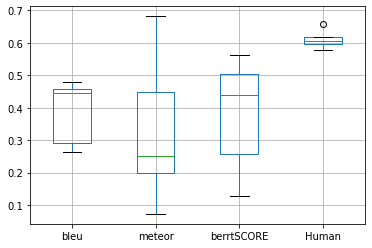

In [447]:
boxplot = df.boxplot(column=['bleu','meteor', 'berrtSCORE','Avg'])

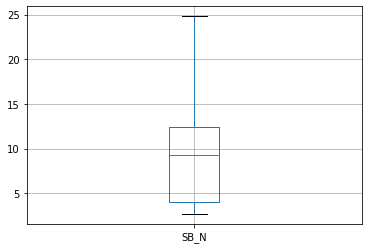

In [448]:
boxplot1 = df0_f.boxplot(column=['sacreBleu']) 
#made it saperatly because the range is 1-100